<a href="https://colab.research.google.com/github/jazima2004/fooddeliveymodel/blob/main/Untitled6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [4]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [5]:
train_df = pd.read_csv("train.csv")

In [6]:
train_df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [7]:
train_df.isnull().sum()

,0
ID,0
Delivery_person_ID,0
Delivery_person_Age,0
Delivery_person_Ratings,0
Restaurant_latitude,0
Restaurant_longitude,0
Delivery_location_latitude,0
Delivery_location_longitude,0
Order_Date,0
Time_Orderd,0


In [8]:
# Set the earth's radius (in kilometers)
R = 6371

# Convert degrees to radians
def deg_to_rad(degrees):
    return degrees * (np.pi/180)

# Function to calculate the distance between two points using the haversine formula
def distcalculate(lat1, lon1, lat2, lon2):
    d_lat = deg_to_rad(lat2-lat1)
    d_lon = deg_to_rad(lon2-lon1)
    a = np.sin(d_lat/2)**2 + np.cos(deg_to_rad(lat1)) * np.cos(deg_to_rad(lat2)) * np.sin(d_lon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c

# Calculate the distance between each pair of points
train_df['distance'] = np.nan

for i in range(len(train_df)):
    train_df.loc[i, 'distance'] = distcalculate(train_df.loc[i, 'Restaurant_latitude'],
                                        train_df.loc[i, 'Restaurant_longitude'],
                                        train_df.loc[i, 'Delivery_location_latitude'],
                                        train_df.loc[i, 'Delivery_location_longitude'])

In [9]:
print(train_df.head())

        ID Delivery_person_ID Delivery_person_Age Delivery_person_Ratings  \
0  0x4607     INDORES13DEL02                   37                     4.9   
1  0xb379     BANGRES18DEL02                   34                     4.5   
2  0x5d6d     BANGRES19DEL01                   23                     4.4   
3  0x7a6a    COIMBRES13DEL02                   38                     4.7   
4  0x70a2     CHENRES12DEL01                   32                     4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude  Order_Date Time_Orderd  ...  \
0                

In [10]:
# Check data
print(train_df.head())
print(train_df.shape)

# Drop NaN values in important columns
train_df = train_df.dropna(subset=['distance', 'Time_taken(min)'])

# Impute or drop NaN values in X (Delivery_person_Age)
# Option 1: Drop rows with NaN in 'Delivery_person_Age'
# train_df = train_df.dropna(subset=['Delivery_person_Age'])
# Option 2: Impute NaN values with the mean
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # or strategy='median'
train_df['distance'] = imputer.fit_transform(train_df[['distance']])

# Convert 'Time_taken(min)' to string before using .str
train_df['Time_taken(min)'] = train_df['Time_taken(min)'].astype(str)

# Extract numeric values from 'Time_taken(min)' column
train_df['Time_taken(min)'] = train_df['Time_taken(min)'].str.extract('(\d+)').astype(float)  # Extract digits and convert to float

# Now do Linear Regression
X = train_df[['distance']]
y = train_df['Time_taken(min)']

model = LinearRegression()
model.fit(X, y)

        ID Delivery_person_ID Delivery_person_Age Delivery_person_Ratings  \
0  0x4607     INDORES13DEL02                   37                     4.9   
1  0xb379     BANGRES18DEL02                   34                     4.5   
2  0x5d6d     BANGRES19DEL01                   23                     4.4   
3  0x7a6a    COIMBRES13DEL02                   38                     4.7   
4  0x70a2     CHENRES12DEL01                   32                     4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude  Order_Date Time_Orderd  ...  \
0                

LinearRegression()

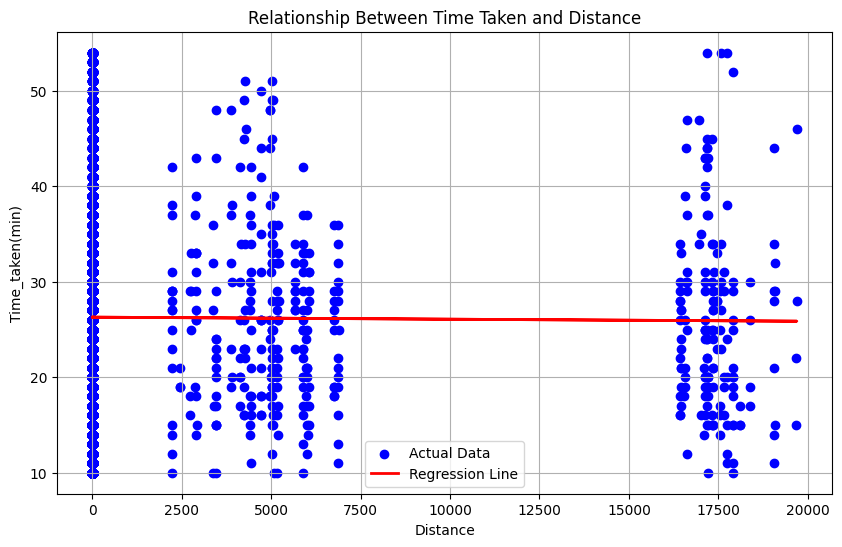

In [11]:
# Predict and Plot
y_pred = model.predict(X)

plt.figure(figsize=(10,6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Relationship Between Time Taken and Distance')
plt.xlabel('Distance')
plt.ylabel('Time_taken(min)')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# Check data
print(train_df.head())
print(train_df.shape)

# Drop NaN values in important columns
train_df = train_df.dropna(subset=['Delivery_person_Age', 'Time_taken(min)'])

# Impute or drop NaN values in X (Delivery_person_Age)
# Option 1: Drop rows with NaN in 'Delivery_person_Age'
# train_df = train_df.dropna(subset=['Delivery_person_Age'])
# Option 2: Impute NaN values with the mean
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # or strategy='median'
train_df['Delivery_person_Age'] = imputer.fit_transform(train_df[['Delivery_person_Age']])

# Convert 'Time_taken(min)' to string before using .str
train_df['Time_taken(min)'] = train_df['Time_taken(min)'].astype(str)

# Extract numeric values from 'Time_taken(min)' column
train_df['Time_taken(min)'] = train_df['Time_taken(min)'].str.extract('(\d+)').astype(float)  # Extract digits and convert to float

# Now do Linear Regression
X = train_df[['Delivery_person_Age']]
y = train_df['Time_taken(min)']

model = LinearRegression()
model.fit(X, y)


        ID Delivery_person_ID Delivery_person_Age Delivery_person_Ratings  \
0  0x4607     INDORES13DEL02                   37                     4.9   
1  0xb379     BANGRES18DEL02                   34                     4.5   
2  0x5d6d     BANGRES19DEL01                   23                     4.4   
3  0x7a6a    COIMBRES13DEL02                   38                     4.7   
4  0x70a2     CHENRES12DEL01                   32                     4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude  Order_Date Time_Orderd  ...  \
0                

LinearRegression()

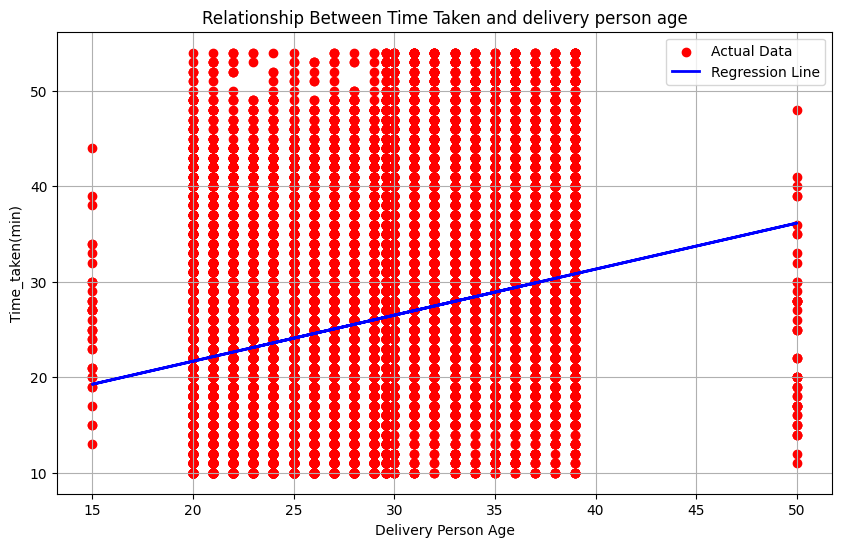

In [13]:
# Predict and Plot
y_pred = model.predict(X)

plt.figure(figsize=(10,6))
plt.scatter(X, y, color='red', label='Actual Data')
plt.plot(X, y_pred, color='blue', linewidth=2, label='Regression Line')
plt.title('Relationship Between Time Taken and delivery person age')
plt.xlabel('Delivery Person Age')
plt.ylabel('Time_taken(min)')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# Check data
print(train_df.head())
print(train_df.shape)

# Drop NaN values in important columns
train_df = train_df.dropna(subset=['Delivery_person_Ratings', 'Time_taken(min)'])


# train_df = train_df.dropna(subset=['Delivery_person_Age'])
# Option 2: Impute NaN values with the mean
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # or strategy='median'
train_df['Delivery_person_Ratings'] = imputer.fit_transform(train_df[['Delivery_person_Ratings']])

# Convert 'Time_taken(min)' to string before using .str
train_df['Time_taken(min)'] = train_df['Time_taken(min)'].astype(str)

# Extract numeric values from 'Time_taken(min)' column
train_df['Time_taken(min)'] = train_df['Time_taken(min)'].str.extract('(\d+)').astype(float)  # Extract digits and convert to float

# Now do Linear Regression
X = train_df[['Delivery_person_Ratings']]
y = train_df['Time_taken(min)']

model = LinearRegression()
model.fit(X, y)


        ID Delivery_person_ID  Delivery_person_Age Delivery_person_Ratings  \
0  0x4607     INDORES13DEL02                  37.0                     4.9   
1  0xb379     BANGRES18DEL02                  34.0                     4.5   
2  0x5d6d     BANGRES19DEL01                  23.0                     4.4   
3  0x7a6a    COIMBRES13DEL02                  38.0                     4.7   
4  0x70a2     CHENRES12DEL01                  32.0                     4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude  Order_Date Time_Orderd  ...  \
0          

LinearRegression()

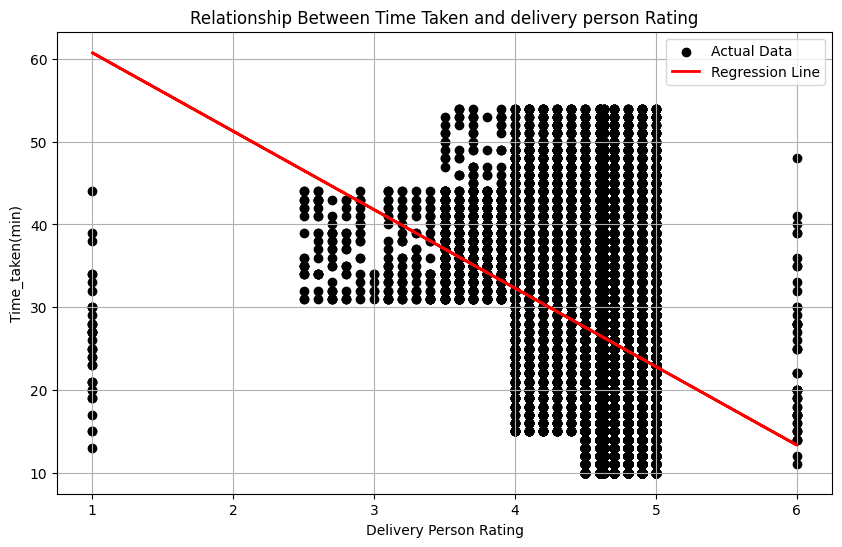

In [15]:
y_pred = model.predict(X)

plt.figure(figsize=(10,6))
plt.scatter(X, y, color='black', label='Actual Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Relationship Between Time Taken and delivery person Rating')
plt.xlabel('Delivery Person Rating')
plt.ylabel('Time_taken(min)')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

x = np.array(train_df[["Delivery_person_Age",
                   "Delivery_person_Ratings",
                   "distance"]])
y = np.array(train_df[["Time_taken(min)"]])
xtrain, xtest, ytrain, ytest = train_test_split(x, y,
                                                test_size=0.10,
                                                random_state=42)

# creating the LSTM neural network model
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(xtrain.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 3, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(xtrain, ytrain, batch_size=1, epochs=9)

Epoch 1/9
41033/41033 ━━━━━━━━━━━━━━━━━━━━ 245s 6ms/step - loss: 76.8893
Epoch 2/9
41033/41033 ━━━━━━━━━━━━━━━━━━━━ 242s 6ms/step - loss: 65.8299
Epoch 3/9
41033/41033 ━━━━━━━━━━━━━━━━━━━━ 235s 6ms/step - loss: 62.1757
Epoch 4/9
41033/41033 ━━━━━━━━━━━━━━━━━━━━ 264s 6ms/step - loss: 61.7173
Epoch 5/9
41033/41033 ━━━━━━━━━━━━━━━━━━━━ 279s 6ms/step - loss: 60.0204
Epoch 6/9
41033/41033 ━━━━━━━━━━━━━━━━━━━━ 265s 6ms/step - loss: 59.5073
Epoch 7/9
41033/41033 ━━━━━━━━━━━━━━━━━━━━ 254s 6ms/step - loss: 59.5523
Epoch 8/9
41033/41033 ━━━━━━━━━━━━━━━━━━━━ 252s 6ms/step - loss: 59.9191
Epoch 9/9
41033/41033 ━━━━━━━━━━━━━━━━━━━━ 266s 6ms/step - loss: 59.9378


In [19]:
print("Food Delivery Time Prediction")
a = int(input("Age of Delivery Partner: "))
b = float(input("Ratings of Previous Deliveries: "))
c = int(input("Total Distance: "))

features = np.array([[a, b, c]])
print("Predicted Delivery Time in Minutes = ", model.predict(features))


Food Delivery Time Prediction
Age of Delivery Partner: 20
Ratings of Previous Deliveries: 3
Total Distance: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step
Predicted Delivery Time in Minutes =  [[28.092476]]


In [20]:
# Save the trained LSTM model
model.save('food_delivery_model.keras')

In [21]:
from keras.models import load_model

model = load_model('food_delivery_model.keras')
